In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


In [2]:
clicks = [{'x': 10, 'y': 80}, {'x': 10, 'y': 80}, {'x': 10, 'y': 80}, {'x': 10, 'y': 80}, {'x': 1468, 'y': 83}, {'x': 1468, 'y': 83}, {'x': 1468, 'y': 83}, {'x': 1468, 'y': 83}, {'x': 1468, 'y': 83}, {'x': 1468, 'y': 812}, {'x': 1468, 'y': 812}, {'x': 1468, 'y': 812}, {'x': 1468, 'y': 812}, {'x': 1468, 'y': 812}]
maxX = 0
maxY = 0
for click in clicks:
    if click["x"] > maxX:
        maxX = click["x"]
    if click["y"] > maxY:
        maxY = click["y"]

# print(maxX, maxY)
frame = np.zeros((maxX,maxY))

for click in clicks:
    # print(click['x'], click['y'])
    frame[click['x']-1][click['y']-1] += 1
frame = frame.transpose()
frame = gaussian_filter(frame, sigma=25)

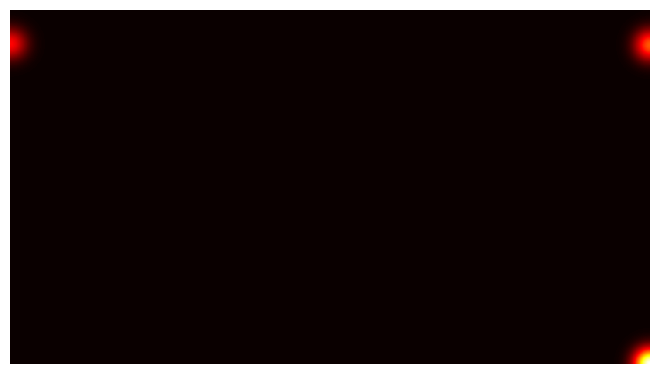

In [19]:
plt.figure()
plt.imshow(frame, cmap='hot', interpolation='nearest')
# plt.colorbar()
plt.axis("off")
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.savefig("heatmap.png",bbox_inches='tight')
plt.show()

In [27]:
img1 = Image.open("screen.png")
img2 = Image.open("heatmap.png")

img1 = img1.resize(img2.size)

blended_image = Image.blend(img1, img2, alpha=0.5)
blended_image.show()